In [1]:
using Plots, LaTeXStrings
using DataFrames, CSV

In [2]:
GPU_errors_df = DataFrame(CSV.File("../data/GPUArrays_errors.csv"))
CPU_errors_df = DataFrame(CSV.File("../data/LogProbabilities_errors.csv"))
min_players = minimum(GPU_errors_df[:,:players])
max_players = maximum(GPU_errors_df[:,:players])
min_strats = minimum(GPU_errors_df[:,:strategies])
max_strats = maximum(GPU_errors_df[:,:strategies])
player_range = min_players:max_players
strat_range = min_strats:max_strats
function get_error(df,p,s;col=4)
    values = Array(df[df.players .== p .&& df.strategies .== s, 3:end])
    if length(values) > 0
        return values[col]
    else
        return NaN
    end
end

get_error (generic function with 1 method)

In [3]:
GPU_max_errors_array = zeros(max_players - min_players + 1, max_strats - min_strats + 1)
fill!(GPU_max_errors_array, NaN)
CPU_max_errors_array = zeros(max_players - min_players + 1, max_strats - min_strats + 1)
fill!(CPU_max_errors_array, NaN)
for s in min_strats:max_strats
    for p in min_players:max_players
        GPU_max_errors_array[p-1,s-1] = get_error(GPU_errors_df, p, s)[end]
        CPU_max_errors_array[p-1,s-1] = get_error(CPU_errors_df, p, s)
    end
end

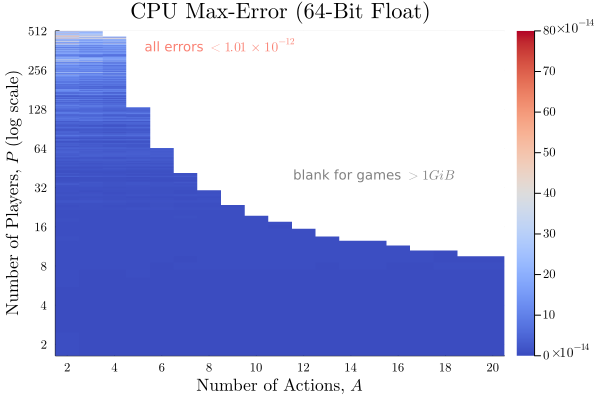

In [9]:
y_ticks = [2^i for i=1:ceil(Int, log(2,max_players))]
x_ticks = [2*i for i=1:max_strats ÷ 2]
heatmap(strat_range, player_range, CPU_max_errors_array .* 1e14, clim=(0, 80), yscale=:log10,
        yticks=(y_ticks,y_ticks), ylabel=L"Number of Players, $P$ (log scale)",
        xlabel=L"Number of Actions, $A$", xticks=(x_ticks,x_ticks), c = :coolwarm,
        right_margin=7Plots.mm, title="CPU Max-Error (64-Bit Float)", fontfamily="Computer Modern")
annotate!(23.55, 560, text(L"\times 10^{-14}", 9))
annotate!(23.35, 1.8, text(L"\times 10^{-14}", 9))
annotate!(15, 40, text(L"blank for games $> 1 GiB$", 9, color=:gray))
annotate!(8.5, 400, text(L"all errors $< 1.01 \times 10^{-12}$", 9, color=:salmon))
# savefig("../figures/float_precision_cpu.png")

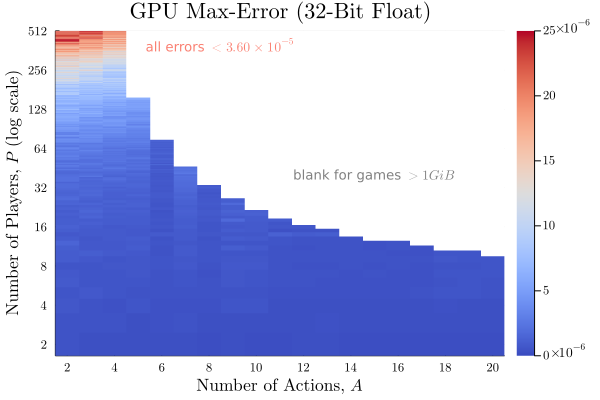

In [10]:
y_ticks = [2^i for i=1:ceil(Int, log(2,max_players))]
x_ticks = [2*i for i=1:max_strats ÷ 2]
heatmap(strat_range, player_range, GPU_max_errors_array .* 1e6, clim=(0, 25), yscale=:log10,
        yticks=(y_ticks,y_ticks), ylabel=L"Number of Players, $P$ (log scale)",
        xlabel=L"Number of Actions, $A$", xticks=(x_ticks,x_ticks), c = :coolwarm,
        right_margin=7Plots.mm, title="GPU Max-Error (32-Bit Float)", fontfamily="Computer Modern")
annotate!(23.45, 560, text(L"\times 10^{-6}", 9))
annotate!(23.25, 1.8, text(L"\times 10^{-6}", 9))
annotate!(15, 40, text(L"blank for games $> 1 GiB$", 9, color=:gray))
annotate!(8.5, 400, text(L"all errors $< 3.60 \times 10^{-5}$", 9, color=:salmon))
# savefig("../figures/float_precision_gpu.png")

In [32]:
println(maximum(GPU_max_errors_array[.!isnan.(GPU_max_errors_array)]))
linear_index_argmax = argmax(GPU_max_errors_array[.!isnan.(GPU_max_errors_array)])
argmax_index = CartesianIndices(GPU_max_errors_array)[linear_index_argmax]
println(argmax_index)

3.594768043471218e-5
CartesianIndex(441, 1)


In [33]:
println(maximum(CPU_max_errors_array[.!isnan.(CPU_max_errors_array)]))
linear_index_argmax = argmax(CPU_max_errors_array[.!isnan.(CPU_max_errors_array)])
argmax_index = CartesianIndices(CPU_max_errors_array)[linear_index_argmax]
println(argmax_index)

1.0061030116015434e-12
CartesianIndex(463, 1)


In [45]:
GPU_99_errors_array = zeros(max_players - min_players + 1, max_strats - min_strats + 1)
fill!(GPU_99_errors_array, NaN)
CPU_99_errors_array = zeros(max_players - min_players + 1, max_strats - min_strats + 1)
fill!(CPU_99_errors_array, NaN)
for s in min_strats:max_strats
    for p in min_players:max_players
        GPU_99_errors_array[p-1,s-1] = get_error(GPU_errors_df, p, s; col=1)
        CPU_99_errors_array[p-1,s-1] = get_error(CPU_errors_df, p, s; col=1)
    end
end
println("GPU 99th percentile:")
println(maximum(GPU_99_errors_array[.!isnan.(GPU_99_errors_array)]))
println("CPU 99th percentile:")
println(maximum(CPU_99_errors_array[.!isnan.(CPU_99_errors_array)]))

GPU 99th percentile:
1.659178128620216e-5
CPU 99th percentile:
6.769367824843635e-13
